# Part 0: Data Pre-processing

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [141]:
# load data here
# may not use everything, reading just in case
# thanks to Tim's notebook - able to simplify the code by a lot!
file_path = 'OHIE_dta/'
des_data = pd.read_stata(file_path+'oregonhie_descriptive_vars.dta')
state_data = pd.read_stata(file_path+'oregonhie_stateprograms_vars.dta')
s0m_data = pd.read_stata(file_path+'oregonhie_survey0m_vars.dta')
s6m_data = pd.read_stata(file_path+'oregonhie_survey6m_vars.dta')
s12m_data = pd.read_stata(file_path+'oregonhie_survey12m_vars.dta')
ips_data = pd.read_stata(file_path+'oregonhie_inperson_vars.dta')
ed_data = pd.read_stata(file_path+'oregonhie_ed_vars.dta')
pat_data = pd.read_stata(file_path+'oregonhie_patterns_vars.dta')

In [142]:
des_data = des_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
#des_data.replace(-1, np.nan, inplace=True)
des_subdata = des_data[['person_id', 'household_id', 'treatment', 'draw_lottery', 'applied_app', 'approved_app', 
                        'numhh_list', 'birthyear_list', 'have_phone_list', 'english_list', 'female_list', 
                        'first_day_list', 'last_day_list', 'pobox_list', 'self_list', 'week_list', 'zip_msa_list']]
des_subdata.loc[:,"numhh_list"] = des_subdata["numhh_list"] + 1

In [143]:
des_subdata['OHIE_app_ins'] = des_subdata['treatment'] * des_subdata['applied_app'] * des_subdata['approved_app']
des_subdata['age'] = 2008 - des_subdata['birthyear_list']
des_subdata[:3]
# this is my very dumb approach to keep track of who got insurance through the lottery
# may not be useful, but it is here

/var/folders/dc/j_9rc1xd6xj5836y93540spc0000gn/T/ipykernel_1957/6371360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_subdata['OHIE_app_ins'] = des_subdata['treatment'] * des_subdata['applied_app'] * des_subdata['approved_app']
/var/folders/dc/j_9rc1xd6xj5836y93540spc0000gn/T/ipykernel_1957/6371360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_subdata['age'] = 2008 - des_subdata['birthyear_list']


,person_id,household_id,treatment,draw_lottery,applied_app,approved_app,numhh_list,birthyear_list,have_phone_list,english_list,female_list,first_day_list,last_day_list,pobox_list,self_list,week_list,zip_msa_list,OHIE_app_ins,age
0,1.0,100001.0,1,6,1,0,1,1978,1,1,0,0,0,1,1,1,1,0,30
1,2.0,100002.0,1,5,0,0,1,1984,1,1,1,0,0,0,1,2,1,0,24
2,3.0,100003.0,0,1,-1,-1,1,1971,1,1,1,0,0,0,1,2,1,0,37


In [133]:
state_data = state_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
state_data.replace(-1, np.nan, inplace=True)

In [63]:
state_vars1 = ['person_id', 'ohp_all_ever_matchn_30sep2009','ohp_all_end_30sep2009', 'ohp_all_mo_matchn_30sep2009', 
              'snap_ever_prenotify07', 'snap_ever_matchn_30sep2009', 'snap_tot_hh_prenotify07',
              'snap_tot_hh_30sep2009', 'tanf_ever_prenotify07', 'tanf_ever_matchn_30sep2009',
               'tanf_tot_hh_prenotify07', 'tanf_tot_hh_30sep2009']
state_subdata1 = pd.DataFrame(state_data[state_vars1])

In [64]:
state_vars2 = ['person_id', 'ohp_all_ever_firstn_30sep2009','ohp_all_end_30sep2009', 'ohp_all_mo_firstn_30sep2009',
              'snap_ever_presurvey12m', 'snap_ever_firstn_survey12m', 'snap_tot_hh_presurvey12m',
              'snap_tot_hh_firstn_survey12m', 'tanf_ever_presurvey12m', 'tanf_ever_firstn_survey12m',
               'tanf_tot_hh_presurvey12m', 'tanf_tot_hh_firstn_survey12m']
state_subdata2 = pd.DataFrame(state_data[state_vars2])

In [461]:
# these two do have differences (albeit not sure significant)
#state_subdata['ohp_all_ever_matchn_30sep2009'].value_counts()
#NOT enrolled    56909
#Enrolled        18013
#state_subdata['ohp_all_ever_firstn_30sep2009'].value_counts() # codebook is wrong
#NOT enrolled    56563
#Enrolled        18359

# there's smth interesting going on here, but not quite sure what
# for difference firstn and matchn, see codebook
# I was going to use matchn, but then Finkelstein (2012) used firstn and I cannot find their rationale for doing so...
# so maybe do matchn (which I find it easier to justify logically), and then we can do it against firstn for robustness check??

In [65]:
# Survey 12
s12m_data = s12m_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
s12m_data.replace(-1, np.nan, inplace=True)

In [66]:
s12m_data.head()

,person_id,sample_12m,dt_mail_12m,dt_returned_12m,ret_mode_12m,returned_12m,surv_lang_12m,in_survey_12m,sample_12m_resp,sample_12m_nonresp,...,live_alone_12m,live_parents_12m,live_relatives_12m,live_friends_12m,live_other_12m,hhsize_12m,num19_12m,needmet_med_cor_12m,needmet_rx_cor_12m,needmet_dent_cor_12m
0,1.0,1,5.0,2009-11-24,Mail,1.0,English,1.0,1,0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2.0,1,5.0,2009-08-31,Mail,1.0,English,1.0,1,0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,3.0,1,3.0,NaT,,0.0,,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0,NaN,NaT,,NaN,,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1,6.0,2009-08-21,Mail,1.0,Spanish,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,0.0


In [144]:
data12m = pd.merge(des_subdata, state_data, on='person_id', how='left')

In [145]:
data12m = pd.merge(data12m, s12m_data, on='person_id', how='left')

In [127]:
pd.set_option('display.max_columns', None)

In [146]:
data12m.head()

,person_id,household_id,treatment,draw_lottery,applied_app,approved_app,numhh_list,birthyear_list,have_phone_list,english_list,female_list,first_day_list,last_day_list,pobox_list,self_list,week_list,zip_msa_list,OHIE_app_ins,age,ohp_all_ever_matchn_30sep2009,ohp_all_ever_firstn_survey0m,ohp_all_ever_firstn_survey6m,ohp_all_ever_inperson,ohp_all_ever_firstn_30sep2009,ohp_all_end_30sep2009,ohp_all_end_survey0m,ohp_all_end_survey6m,ohp_all_end_inperson,ohp_all_at_12m,ohp_all_mo_matchn_30sep2009,ohp_all_mo_firstn_survey0m,ohp_all_mo_firstn_survey6m,ohp_all_mo_inperson,ohp_all_mo_firstn_30sep2009,ohp_all_mo_12m,ohp_std_ever_matchn_30sep2009,ohp_std_ever_inperson,ohp_std_ever_firstn_30sep2009,snap_ever_prenotify07,snap_ever_presurvey12m,snap_ever_matchn_30sep2009,snap_ever_firstn_survey12m,snap_tot_hh_prenotify07,snap_tot_hh_presurvey12m,snap_tot_hh_30sep2009,snap_tot_hh_firstn_survey12m,tanf_ever_prenotify07,tanf_ever_presurvey12m,tanf_ever_matchn_30sep2009,tanf_ever_firstn_survey12m,tanf_tot_hh_prenotify07,tanf_tot_hh_presurvey12m,tanf_tot_hh_30sep2009,tanf_tot_hh_firstn_survey12m,sample_12m,dt_mail_12m,dt_returned_12m,ret_mode_12m,returned_12m,surv_lang_12m,in_survey_12m,sample_12m_resp,sample_12m_nonresp,sample_12m_nonzeroweight,weight_intensive_12m,weight_newlottery_12m,weight_12m,wave_survey12m,protocol_12m,ins_any_12m,ins_ohp_12m,ins_medicare_12m,ins_employer_12m,ins_privpay_12m,ins_othcov_12m,ins_noins_12m,ins_private_12m,ins_other_12m,ins_months_12m,usual_place_12m,usual_care_12m,usual_clinic_12m,usual_doc_12m,need_med_12m,needmet_qn_med_12m,needmet_med_12m,reason_care_cost_12m,reason_care_ins_12m,reason_care_doc_12m,reason_care_owe_12m,reason_care_apt_12m,reason_care_closed_12m,reason_care_nodoc_12m,reason_care_other_12m,reason_care_dont_12m,need_rx_12m,needmet_qn_rx_12m,needmet_rx_12m,reason_rx_cost_12m,reason_rx_ins_12m,reason_rx_doc_12m,reason_rx_get_12m,reason_rx_pharm_12m,reason_rx_other_12m,reason_rx_dont_12m,rx_any_12m,rx_num_mod_12m,need_dent_12m,needmet_qn_dent_12m,needmet_dent_12m,doc_any_12m,doc_num_mod_12m,er_any_12m,er_num_mod_12m,reason_er_need_12m,reason_er_insure_12m,reason_er_closed_12m,reason_er_apt_12m,reason_er_doc_12m,reason_er_copay_12m,reason_er_go_12m,reason_er_other_12m,reason_er_rx_12m,reason_er_dont_12m,er_noner_12m,hosp_any_12m,hosp_num_mod_12m,med_qual_12m,med_qual_bin_12m,cost_any_oop_12m,cost_doc_oop_12m,cost_er_oop_12m,cost_rx_oop_12m,cost_oth_oop_12m,cost_tot_oop_12m,cost_any_owe_12m,cost_tot_owe_12m,cost_borrow_12m,cost_refused_12m,happiness_12m,health_gen_12m,health_gen_bin_12m,health_chg_12m,health_chg_bin_12m,baddays_phys_12m,baddays_ment_12m,baddays_tot_12m,health_work_12m,physical_act_12m,dep_interest_12m,dep_sad_12m,dia_dx_12m,ast_dx_12m,hbp_dx_12m,emp_dx_12m,ami_dx_12m,chf_dx_12m,dep_dx_12m,chl_dx_12m,kid_dx_12m,dia_rx_12m,ast_rx_12m,hbp_rx_12m,emp_rx_12m,ami_rx_12m,chf_rx_12m,dep_rx_12m,chl_rx_12m,kid_rx_12m,chl_chk_12m,dia_chk_12m,mam_chk_12m,pap_chk_12m,smk_ever_12m,smk_curr_12m,smk_avg_mod_12m,smk_quit_12m,female_12m,birthyear_12m,employ_12m,employ_det_12m,employ_hrs_12m,hhinc_cat_12m,hhinc_pctfpl_12m,race_hisp_12m,race_white_12m,race_black_12m,race_amerindian_12m,race_asian_12m,race_pacific_12m,race_other_qn_12m,edu_12m,live_partner_12m,live_alone_12m,live_parents_12m,live_relatives_12m,live_friends_12m,live_other_12m,hhsize_12m,num19_12m,needmet_med_cor_12m,needmet_rx_cor_12m,needmet_dent_cor_12m
0,1.0,100001.0,1,6,1,0,1,1978,1,1,0,0,0,1,1,1,1,0,30,NOT enrolled,NOT enrolled,NaN,NaN,NOT enrolled,NOT enrolled,NOT enrolled,NaN,NaN,NOT enrolled,0 months,0 months,NaN,NaN,0 months,0 months,NOT enrolled,NaN,NOT enrolled,Yes,Yes,Yes,Yes,7453,5575.0,746,2624.0,No,No,No,No,0.0,0.0,0.0,0.0,In 12m mail survey sample,2009-08-11,2009-11-24,Mail,Yes,English,Yes,12m mail survey responder,NOT a 12m mail survey nonresponder,Non-zero weight member of 12m mail survey sample,1.0,1.000000,1.0,Survey Draw 6,Basic,No,No,No,No,No,No,Yes,No,No,0 months,No,NaN,No,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,N

In [87]:
from sklearn.preprocessing import OrdinalEncoder

In [88]:
fdata12m = data12m.filter(regex='^(?!.*_y$)')
fdata12m = fdata12m.rename(lambda x: x.replace('_x', ''), axis=1)
fdata12m = fdata12m.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.dtype == 'object' else x)
datetime_columns = fdata12m.select_dtypes('datetime64[ns]').columns
ordinal_encoder = OrdinalEncoder()
fdata12m[datetime_columns] = ordinal_encoder.fit_transform(fdata12m[datetime_columns])

In [89]:
fdata12m['returned_12m']

0        1.0
1        1.0
2        0.0
3        NaN
4        1.0
        ... 
74917    NaN
74918    0.0
74919    NaN
74920    1.0
74921    0.0
Name: returned_12m, Length: 74922, dtype: float64

In [73]:
fdata12m.columns.tolist()

['person_id',
 'household_id',
 'treatment',
 'draw_lottery',
 'applied_app',
 'approved_app',
 'numhh_list',
 'birthyear_list',
 'have_phone_list',
 'english_list',
 'female_list',
 'first_day_list',
 'last_day_list',
 'pobox_list',
 'self_list',
 'week_list',
 'zip_msa_list',
 'OHIE_app_ins',
 'age',
 'ohp_all_ever_matchn_30sep2009',
 'ohp_all_end_30sep2009',
 'ohp_all_mo_matchn_30sep2009',
 'snap_ever_prenotify07',
 'snap_ever_matchn_30sep2009',
 'snap_tot_hh_prenotify07',
 'snap_tot_hh_30sep2009',
 'tanf_ever_prenotify07',
 'tanf_ever_matchn_30sep2009',
 'tanf_tot_hh_prenotify07',
 'tanf_tot_hh_30sep2009',
 'sample_12m',
 'dt_mail_12m',
 'dt_returned_12m',
 'ret_mode_12m',
 'returned_12m',
 'surv_lang_12m',
 'in_survey_12m',
 'sample_12m_resp',
 'sample_12m_nonresp',
 'sample_12m_nonzeroweight',
 'weight_intensive_12m',
 'weight_newlottery_12m',
 'weight_12m',
 'wave_survey12m',
 'protocol_12m',
 'ins_any_12m',
 'ins_ohp_12m',
 'ins_medicare_12m',
 'ins_employer_12m',
 'ins_privpay

In [101]:
f12m_resp_data = fdata12m[fdata12m['returned_12m'] == 1]
#f12m_resp_data.dtypes.tolist()

In [216]:
f12m_rest_data = fdata12m[fdata12m['returned_12m'] == 0]
#f12m_rest_data.describe()

In [92]:
from sklearn.impute import KNNImputer

In [93]:
imputer = KNNImputer(n_neighbors=5)
f12m_resp_imp_data = imputer.fit_transform(f12m_resp_data)

I am working on the justification but the idea is that we no longer need to worry about item non-response and can just focus on attrition.

In [94]:
f12m_resp_imp_copy = f12m_resp_imp_data # save a copy just in case I accidentally re-run the above

In [270]:
#f12m_resp_imp_data = f12m_resp_imp_copy
#f12m_resp_imp_data

In [214]:
f12m_resp_imp_data = pd.DataFrame(f12m_resp_imp_data, columns=imputer.get_feature_names_out())
#f12m_resp_imp_data.columns.tolist()

In [271]:
set1 = set(imputer.get_feature_names_out())
set2 = set(f12m_resp_data.columns)

set2 - set1
# {'ret_mode_12m', 'surv_lang_12m'}
# Idk what the heck the imputer did, but these two variables don't concern us too much so I am willing to let go

{'ret_mode_12m', 'surv_lang_12m'}

In [217]:
f12m_rest_data.drop(columns=['ret_mode_12m', 'surv_lang_12m'], inplace=True)

/var/folders/dc/j_9rc1xd6xj5836y93540spc0000gn/T/ipykernel_1957/9085027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f12m_rest_data.drop(columns=['ret_mode_12m', 'surv_lang_12m'], inplace=True)


In [223]:
f12m_imp_data = pd.concat([f12m_resp_imp_data, f12m_rest_data], ignore_index=True)

In [224]:
f12m_imp_data.head()
# looks fine but need to be extra careful about which values are imputed from now on

,person_id,household_id,treatment,draw_lottery,applied_app,approved_app,numhh_list,birthyear_list,have_phone_list,english_list,female_list,first_day_list,last_day_list,pobox_list,self_list,week_list,zip_msa_list,OHIE_app_ins,age,ohp_all_ever_matchn_30sep2009,ohp_all_ever_firstn_survey0m,ohp_all_ever_firstn_survey6m,ohp_all_ever_inperson,ohp_all_ever_firstn_30sep2009,ohp_all_end_30sep2009,ohp_all_end_survey0m,ohp_all_end_survey6m,ohp_all_end_inperson,ohp_all_at_12m,ohp_all_mo_matchn_30sep2009,ohp_all_mo_firstn_survey0m,ohp_all_mo_firstn_survey6m,ohp_all_mo_inperson,ohp_all_mo_firstn_30sep2009,ohp_all_mo_12m,ohp_std_ever_matchn_30sep2009,ohp_std_ever_inperson,ohp_std_ever_firstn_30sep2009,snap_ever_prenotify07,snap_ever_presurvey12m,snap_ever_matchn_30sep2009,snap_ever_firstn_survey12m,snap_tot_hh_prenotify07,snap_tot_hh_presurvey12m,snap_tot_hh_30sep2009,snap_tot_hh_firstn_survey12m,tanf_ever_prenotify07,tanf_ever_presurvey12m,tanf_ever_matchn_30sep2009,tanf_ever_firstn_survey12m,tanf_tot_hh_prenotify07,tanf_tot_hh_presurvey12m,tanf_tot_hh_30sep2009,tanf_tot_hh_firstn_survey12m,sample_12m,dt_mail_12m,dt_returned_12m,returned_12m,in_survey_12m,sample_12m_resp,sample_12m_nonresp,sample_12m_nonzeroweight,weight_intensive_12m,weight_newlottery_12m,weight_12m,wave_survey12m,protocol_12m,ins_any_12m,ins_ohp_12m,ins_medicare_12m,ins_employer_12m,ins_privpay_12m,ins_othcov_12m,ins_noins_12m,ins_private_12m,ins_other_12m,ins_months_12m,usual_place_12m,usual_care_12m,usual_clinic_12m,usual_doc_12m,need_med_12m,needmet_qn_med_12m,needmet_med_12m,reason_care_cost_12m,reason_care_ins_12m,reason_care_doc_12m,reason_care_owe_12m,reason_care_apt_12m,reason_care_closed_12m,reason_care_nodoc_12m,reason_care_other_12m,reason_care_dont_12m,need_rx_12m,needmet_qn_rx_12m,needmet_rx_12m,reason_rx_cost_12m,reason_rx_ins_12m,reason_rx_doc_12m,reason_rx_get_12m,reason_rx_pharm_12m,reason_rx_other_12m,reason_rx_dont_12m,rx_any_12m,rx_num_mod_12m,need_dent_12m,needmet_qn_dent_12m,needmet_dent_12m,doc_any_12m,doc_num_mod_12m,er_any_12m,er_num_mod_12m,reason_er_need_12m,reason_er_insure_12m,reason_er_closed_12m,reason_er_apt_12m,reason_er_doc_12m,reason_er_copay_12m,reason_er_go_12m,reason_er_other_12m,reason_er_rx_12m,reason_er_dont_12m,er_noner_12m,hosp_any_12m,hosp_num_mod_12m,med_qual_12m,med_qual_bin_12m,cost_any_oop_12m,cost_doc_oop_12m,cost_er_oop_12m,cost_rx_oop_12m,cost_oth_oop_12m,cost_tot_oop_12m,cost_any_owe_12m,cost_tot_owe_12m,cost_borrow_12m,cost_refused_12m,happiness_12m,health_gen_12m,health_gen_bin_12m,health_chg_12m,health_chg_bin_12m,baddays_phys_12m,baddays_ment_12m,baddays_tot_12m,health_work_12m,physical_act_12m,dep_interest_12m,dep_sad_12m,dia_dx_12m,ast_dx_12m,hbp_dx_12m,emp_dx_12m,ami_dx_12m,chf_dx_12m,dep_dx_12m,chl_dx_12m,kid_dx_12m,dia_rx_12m,ast_rx_12m,hbp_rx_12m,emp_rx_12m,ami_rx_12m,chf_rx_12m,dep_rx_12m,chl_rx_12m,kid_rx_12m,chl_chk_12m,dia_chk_12m,mam_chk_12m,pap_chk_12m,smk_ever_12m,smk_curr_12m,smk_avg_mod_12m,smk_quit_12m,female_12m,birthyear_12m,employ_12m,employ_det_12m,employ_hrs_12m,hhinc_cat_12m,hhinc_pctfpl_12m,race_hisp_12m,race_white_12m,race_black_12m,race_amerindian_12m,race_asian_12m,race_pacific_12m,race_other_qn_12m,edu_12m,live_partner_12m,live_alone_12m,live_parents_12m,live_relatives_12m,live_friends_12m,live_other_12m,hhsize_12m,num19_12m,needmet_med_cor_12m,needmet_rx_cor_12m,needmet_dent_cor_12m
0,1.0,100001.0,1.0,6.0,1.0,0.0,1.0,1978.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,30.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,1.6,1.6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,7453.0,5575.0,746.0,2624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,132.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.6,3.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.4,0.8,0.2,0.2,0.4,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,15.0,30.0,20.0,0.0,2.0,3.0

In [220]:
csv_file_path = 'OHIE/12m_imp_data.csv'
f12m_imp_data.to_csv(csv_file_path, index=False)

# LATE accounting for NA's Using DML
## Part 1: Motivation

Quotes from Finkelstein et al. (2012):

"The survey data allow examination of a much richer set of outcomes than is feasible with administrative data alone, but with a 50% effective response rate, are subject to potential nonresponse bias. Our available evidence on this issue is limited but reasonably reassuring." (Introduction)

"These outcomes are only available for individuals who responded to the mail survey and may therefore not be representative of the full sample." (Data)

"We use the fairly conservative procedure of Lee (2009) to bound the potential bias arising from differential response rates between treatments and controls." (Remark 19)

**What if we can directly address this non-response bias through machine learning?**

**Idea**: Use approach proposed in Lecture 14-15 1.5.1 Missing Values and Homework 4. This notebook will be focused on investigating that.

**Challenge #1**: for most of the outcome variables, we are dealing with item non-response (when responder fails to answer one particular item on the survey) and unit non-response (when the unit fails to respond to the survey as a whole). I don't see a good way to justify this, but by economic intuition, these are two very different kinds of non-response and sometimes can even work against each other (for instance, when a participant is unwilling to disclose the number of prescription drug he/she takes but agrees to take the survey exactly due to financial incentive). I propose focusing on unit non-response and control for item non-response using KNN. The imputation has already been done in part 0.

*I don't have a good justification for using KNN as opposed to some other methodologies except for computational convenience; in fact, I myself was debating between KNN and random forest. I think it is okay to brush through it in the presentation, but I don't know if we can get away with it in the paper.*

In this subsection, I will run the imputed data on the baseline controls stated in Finkelstein et al. (2012), i.e. household size indicators, survey wave indicators, and their interactions, using random forest (which is the same as 2SLS because the regression is saturated). Ideally the estimates obtained should be similar to the estimates in the original paperl, otherwise we will have to justify the bias introduced by item non-response.

In [294]:
# D = ohp_all_ever_matchn_30sep2009
# Z = treatment
# now make sure X (controls) and Y (outcome) are okay

In [157]:
from patsy import dmatrix

In [225]:
# Convert columns to factors
f12m_imp_data['numhh_ori'] = f12m_imp_data['numhh_list']
f12m_imp_data = pd.get_dummies(f12m_imp_data, columns=['numhh_list'], drop_first=False)

f12m_imp_data['wave_ori'] = f12m_imp_data['wave_survey12m']
f12m_imp_data = pd.get_dummies(f12m_imp_data, columns=['wave_survey12m'], drop_first=False)

f12m_imp_data['numhh_wave_intcat'] = pd.Categorical(f12m_imp_data['numhh_ori'].astype(str) + ':' + f12m_imp_data['wave_ori'].astype(str))
f12m_imp_data['numhh_wave_intori'] = f12m_imp_data['numhh_wave_intcat']
f12m_imp_data = pd.get_dummies(f12m_imp_data, columns=['numhh_wave_intcat'], drop_first=False)

In [226]:
f12m_y_imp_data = f12m_imp_data[f12m_imp_data['returned_12m'] == 1]
f12m_n_imp_data = f12m_imp_data[f12m_imp_data['returned_12m'] == 0]

In [184]:
# 1st group: Health Care Utilization
#pip install doubleml
import numpy as np
import doubleml as dml
from doubleml.datasets import make_iivm_data
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [227]:
#f12m_resp_imp_data['rx_any_12m']
#f12m_resp_imp_data = f12m_imp_data[f12m_imp_data['returned_12m'] == 1]
f12m_y_imp_data['rx_any_12m_adj'] = f12m_y_imp_data['rx_any_12m'].apply(lambda x: 1.0 if x >= 0.5 else 0.0)

#f12m_resp_imp_data
# well there's a problem
# do we want to manually scale indc variables ???

/var/folders/dc/j_9rc1xd6xj5836y93540spc0000gn/T/ipykernel_1957/2296137299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f12m_y_imp_data['rx_any_12m_adj'] = f12m_y_imp_data['rx_any_12m'].apply(lambda x: 1.0 if x >= 0.5 else 0.0)


In [229]:
#f12m_y_imp_data.columns.tolist()

In [230]:
controls = ['numhh_list_1.0',
 'numhh_list_2.0',
 'numhh_list_3.0',
 'wave_survey12m_0.0',
 'wave_survey12m_1.0',
 'wave_survey12m_2.0',
 'wave_survey12m_3.0',
 'wave_survey12m_4.0',
 'wave_survey12m_5.0',
 'wave_survey12m_6.0',
 'numhh_wave_intcat_1.0:0.0',
 'numhh_wave_intcat_1.0:1.0',
 'numhh_wave_intcat_1.0:2.0',
 'numhh_wave_intcat_1.0:3.0',
 'numhh_wave_intcat_1.0:4.0',
 'numhh_wave_intcat_1.0:5.0',
 'numhh_wave_intcat_1.0:6.0',
 'numhh_wave_intcat_2.0:0.0',
 'numhh_wave_intcat_2.0:1.0',
 'numhh_wave_intcat_2.0:2.0',
 'numhh_wave_intcat_2.0:3.0',
 'numhh_wave_intcat_2.0:4.0',
 'numhh_wave_intcat_2.0:5.0',
 'numhh_wave_intcat_2.0:6.0',
 'numhh_wave_intcat_3.0:0.0',
 'numhh_wave_intcat_3.0:1.0',
 'numhh_wave_intcat_3.0:2.0']

In [233]:
rx_any_vars = controls + ['ohp_all_ever_matchn_30sep2009', 'treatment', 'rx_any_12m_adj']
rx_any_data = f12m_y_imp_data[rx_any_vars]

In [234]:
ml_g = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_m = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_r = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)

obj_dml_data = dml.DoubleMLData(rx_any_data, 'rx_any_12m_adj', 'ohp_all_ever_matchn_30sep2009', z_cols='treatment')

dml_iivm_obj = dml.DoubleMLIIVM(obj_dml_data, ml_g, ml_m, ml_r)

print(dml_iivm_obj.fit())
# in comparison to coef = 0.088, SE = 0.029, p-val = 0.002
# 0.055723  0.019462  2.863227  0.004193... for non-adjusted
# 0.054848  0.021183  2.589255  0.009618... for adjusted
# opt for non-adjusted??

================== DoubleMLIIVM Object ==================

------------------ Data summary      ------------------
Outcome variable: rx_any_12m_adj
Treatment variable(s): ['ohp_all_ever_matchn_30sep2009']
Covariates: ['numhh_list_1.0', 'numhh_list_2.0', 'numhh_list_3.0', 'wave_survey12m_0.0', 'wave_survey12m_1.0', 'wave_survey12m_2.0', 'wave_survey12m_3.0', 'wave_survey12m_4.0', 'wave_survey12m_5.0', 'wave_survey12m_6.0', 'numhh_wave_intcat_1.0:0.0', 'numhh_wave_intcat_1.0:1.0', 'numhh_wave_intcat_1.0:2.0', 'numhh_wave_intcat_1.0:3.0', 'numhh_wave_intcat_1.0:4.0', 'numhh_wave_intcat_1.0:5.0', 'numhh_wave_intcat_1.0:6.0', 'numhh_wave_intcat_2.0:0.0', 'numhh_wave_intcat_2.0:1.0', 'numhh_wave_intcat_2.0:2.0', 'numhh_wave_intcat_2.0:3.0', 'numhh_wave_intcat_2.0:4.0', 'numhh_wave_intcat_2.0:5.0', 'numhh_wave_intcat_2.0:6.0', 'numhh_wave_intcat_3.0:0.0', 'numhh_wave_intcat_3.0:1.0', 'numhh_wave_intcat_3.0:2.0']
Instrument variable(s): ['treatment']
No. Observations: 23777

------------------

In [236]:
#f12m_y_imp_data['rx_num_mod_12m']

In [240]:
rx_num_vars = controls + ['ohp_all_ever_matchn_30sep2009', 'treatment', 'rx_num_mod_12m']
rx_num_data = f12m_y_imp_data[rx_num_vars]
rx_num_data.head()

,numhh_list_1.0,numhh_list_2.0,numhh_list_3.0,wave_survey12m_0.0,wave_survey12m_1.0,wave_survey12m_2.0,wave_survey12m_3.0,wave_survey12m_4.0,wave_survey12m_5.0,wave_survey12m_6.0,numhh_wave_intcat_1.0:0.0,numhh_wave_intcat_1.0:1.0,numhh_wave_intcat_1.0:2.0,numhh_wave_intcat_1.0:3.0,numhh_wave_intcat_1.0:4.0,numhh_wave_intcat_1.0:5.0,numhh_wave_intcat_1.0:6.0,numhh_wave_intcat_2.0:0.0,numhh_wave_intcat_2.0:1.0,numhh_wave_intcat_2.0:2.0,numhh_wave_intcat_2.0:3.0,numhh_wave_intcat_2.0:4.0,numhh_wave_intcat_2.0:5.0,numhh_wave_intcat_2.0:6.0,numhh_wave_intcat_3.0:0.0,numhh_wave_intcat_3.0:1.0,numhh_wave_intcat_3.0:2.0,ohp_all_ever_matchn_30sep2009,treatment,rx_num_mod_12m
0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.0,1.0,3.2
1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,1.0,1.0,2.8
2,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0,1.0,0.0
3,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,1.0,6.0
4,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0.0,0.0,3.8


In [242]:
ml_g = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_m = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_r = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)

obj_dml_data = dml.DoubleMLData(rx_num_data, 'rx_num_mod_12m', 'ohp_all_ever_matchn_30sep2009', z_cols='treatment')

dml_iivm_obj = dml.DoubleMLIIVM(obj_dml_data, ml_g, ml_m, ml_r)

print(dml_iivm_obj.fit())
# in comparison to coef = 0.347, SE = 0.176, p-val = 0.049
# 0.329914  0.11688  2.822673  0.004763 ... 

================== DoubleMLIIVM Object ==================

------------------ Data summary      ------------------
Outcome variable: rx_num_mod_12m
Treatment variable(s): ['ohp_all_ever_matchn_30sep2009']
Covariates: ['numhh_list_1.0', 'numhh_list_2.0', 'numhh_list_3.0', 'wave_survey12m_0.0', 'wave_survey12m_1.0', 'wave_survey12m_2.0', 'wave_survey12m_3.0', 'wave_survey12m_4.0', 'wave_survey12m_5.0', 'wave_survey12m_6.0', 'numhh_wave_intcat_1.0:0.0', 'numhh_wave_intcat_1.0:1.0', 'numhh_wave_intcat_1.0:2.0', 'numhh_wave_intcat_1.0:3.0', 'numhh_wave_intcat_1.0:4.0', 'numhh_wave_intcat_1.0:5.0', 'numhh_wave_intcat_1.0:6.0', 'numhh_wave_intcat_2.0:0.0', 'numhh_wave_intcat_2.0:1.0', 'numhh_wave_intcat_2.0:2.0', 'numhh_wave_intcat_2.0:3.0', 'numhh_wave_intcat_2.0:4.0', 'numhh_wave_intcat_2.0:5.0', 'numhh_wave_intcat_2.0:6.0', 'numhh_wave_intcat_3.0:0.0', 'numhh_wave_intcat_3.0:1.0', 'numhh_wave_intcat_3.0:2.0']
Instrument variable(s): ['treatment']
No. Observations: 23777

------------------

That's it. I stopped my investigation here because of time. *rx_any_12m* worries me a bit (Finkelstein's estimate falls outside our CI), but *rx_num_12m* works perfectly fine. 

Another small point that the prof pointed out is that N.O. score should help with SE, and they are indeed smaller in our case, though not much. That is a small point we can bring up if we want to.

## # Part 2: Justification

It is easy to see intuitively that many factors can influence both health and financial outcomes and response rate - age, gender, socioeconomic status, etc. - not to mention that the basic versus intensive protocols also introduced some variation.

First, we want to show that this unit non-response bias is correlated with some observed characteristics. We begin the exploration with correlation heatmaps. Note that correlation plots are not entirely valid because they only show marginal relations (instead of joint), but it is a good starting point to gauge which variables are potentially important.

*Update 02/29: prof and TA think it's good to include graphs for certain covariates to show imbalance.*
*also logistic regression???*

In [5]:
# need to read again because my computer crashed
#file_path = 'OHIE/'
#sdata12m = pd.read_csv(file_path+'s12m_data.csv')

In [297]:
#f12m_imp_data.columns.tolist()

In [346]:
f12m_imp_corr1 = f12m_imp_data[['returned_12m', 
          'numhh_list_1.0', 'numhh_list_2.0', 'numhh_list_3.0',
          'wave_survey12m_0.0', 'wave_survey12m_1.0', 'wave_survey12m_2.0', 
          'wave_survey12m_3.0', 'wave_survey12m_4.0', 'wave_survey12m_5.0', 'wave_survey12m_6.0',
          'protocol_12m', 'weight_intensive_12m']]

In [347]:
f12m_imp_corr1.corr().iloc[0, :]

returned_12m            1.000000
numhh_list_1.0         -0.013813
numhh_list_2.0          0.014244
numhh_list_3.0         -0.003456
wave_survey12m_0.0      0.007561
wave_survey12m_1.0      0.003897
wave_survey12m_2.0      0.002640
wave_survey12m_3.0      0.001019
wave_survey12m_4.0      0.000991
wave_survey12m_5.0     -0.013242
wave_survey12m_6.0      0.000694
protocol_12m           -0.203659
weight_intensive_12m    0.175291
Name: returned_12m, dtype: float64

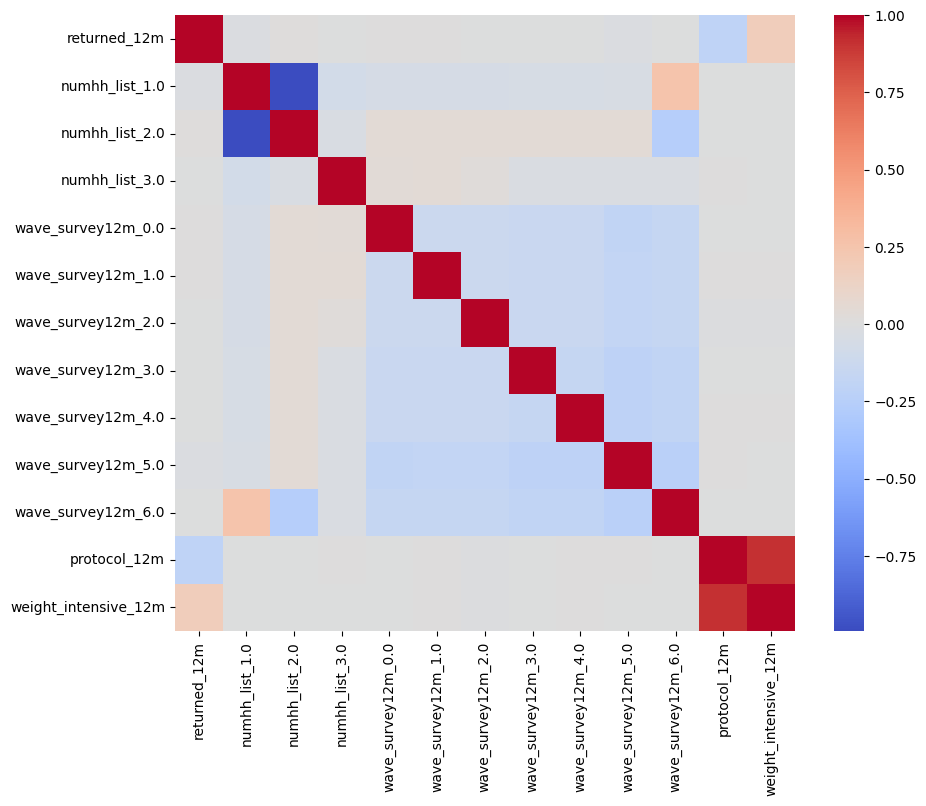

In [348]:
corr1_mat = f12m_imp_corr1.corr() #.iloc[0, :]
# focus on the first row / col

plt.figure(figsize = (10,8))
sns.heatmap(corr1_mat, cmap='coolwarm')
plt.show()
# note protocol_12m_copy_intensive

In [324]:
from matplotlib.pyplot import figure

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

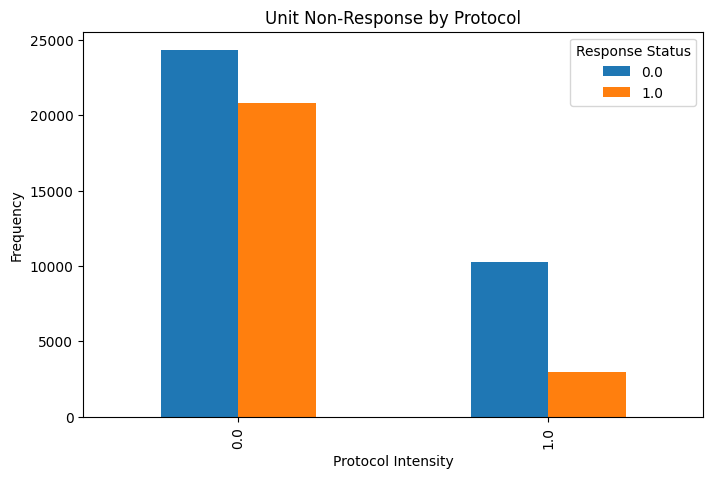

In [337]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)
pd.crosstab(f12m_imp_data.protocol_12m,f12m_imp_data.returned_12m).plot(kind='bar')
plt.title('Unit Non-Response by Protocol')
plt.xlabel('Protocol Intensity')
plt.ylabel('Frequency')

legend = plt.legend()
legend.set_title('Response Status')

plt.savefig('just1')

In [303]:
#f12m_imp_data['age'] = 2009 - f12m_imp_data['birthyear_list']

In [306]:
f12m_imp_corr2 = f12m_imp_data[['returned_12m', 'age', 'have_phone_list', 'english_list', 'female_list', 
                                'first_day_list', 'last_day_list', 'pobox_list', 'self_list', 'week_list',
                                'zip_msa_list', 'OHIE_app_ins']]

In [308]:
f12m_imp_corr2.corr().iloc[0, :]

returned_12m       1.000000
age                0.163250
have_phone_list    0.075261
english_list       0.025452
female_list        0.074957
first_day_list     0.030312
last_day_list     -0.027722
pobox_list         0.024149
self_list          0.007169
week_list         -0.048290
zip_msa_list      -0.035107
OHIE_app_ins       0.048655
Name: returned_12m, dtype: float64

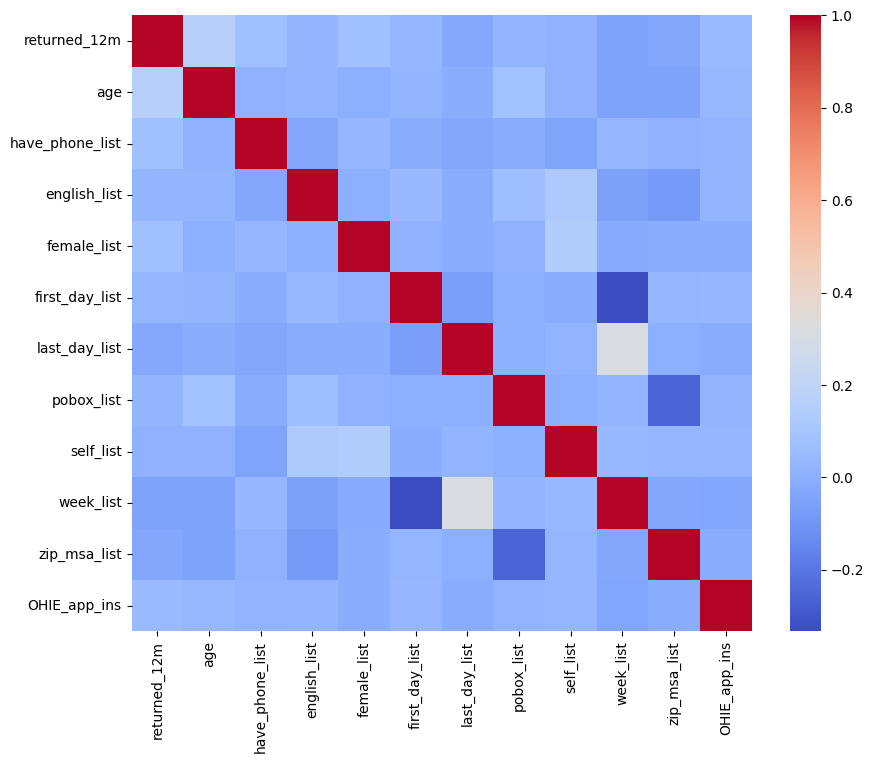

In [310]:
corr2_mat = f12m_imp_corr2.corr() #.iloc[0, :]
# focus on the first row / col

plt.figure(figsize = (10,8))
sns.heatmap(corr2_mat, cmap='coolwarm')
plt.show()
# note age

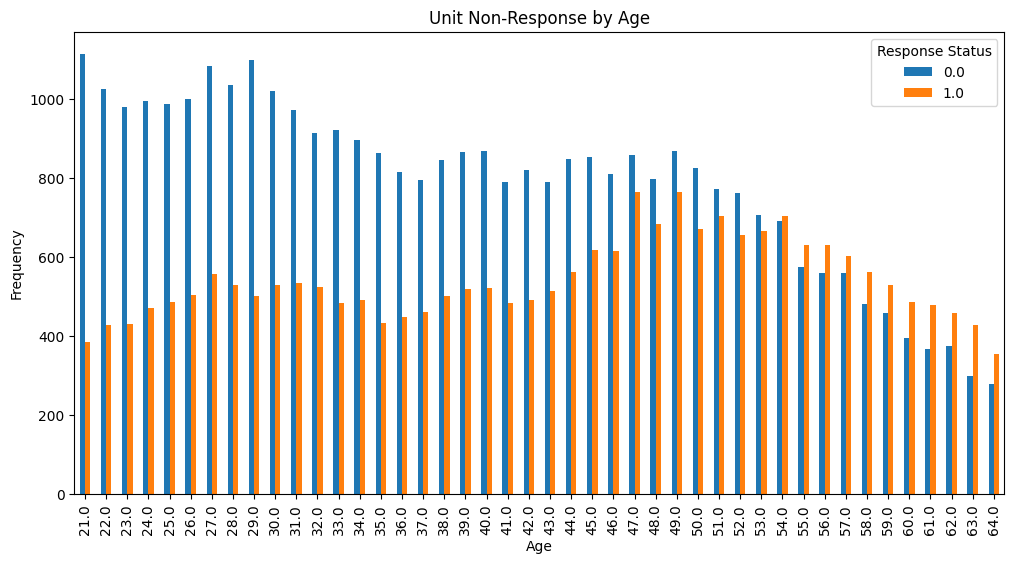

<Figure size 1200x600 with 0 Axes>

In [341]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
#plt.figure(figsize = (12,8))
pd.crosstab(f12m_imp_data.age,f12m_imp_data.returned_12m).plot(kind='bar')
plt.title('Unit Non-Response by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

legend = plt.legend()
legend.set_title('Response Status')
plt.show()

plt.savefig('just2')


In [342]:
f12m_imp_corr3 = f12m_imp_data[['returned_12m', 'snap_ever_prenotify07', 'snap_ever_matchn_30sep2009',
                                'snap_tot_hh_prenotify07', 'snap_tot_hh_30sep2009', 'tanf_ever_prenotify07',
                                'tanf_ever_matchn_30sep2009','tanf_tot_hh_prenotify07','tanf_tot_hh_30sep2009']]

In [343]:
f12m_imp_corr3.corr().iloc[0, :]

returned_12m                  1.000000
snap_ever_prenotify07        -0.018112
snap_ever_matchn_30sep2009    0.007251
snap_tot_hh_prenotify07      -0.021498
snap_tot_hh_30sep2009         0.003565
tanf_ever_prenotify07        -0.036198
tanf_ever_matchn_30sep2009   -0.042889
tanf_tot_hh_prenotify07      -0.025347
tanf_tot_hh_30sep2009        -0.037253
Name: returned_12m, dtype: float64

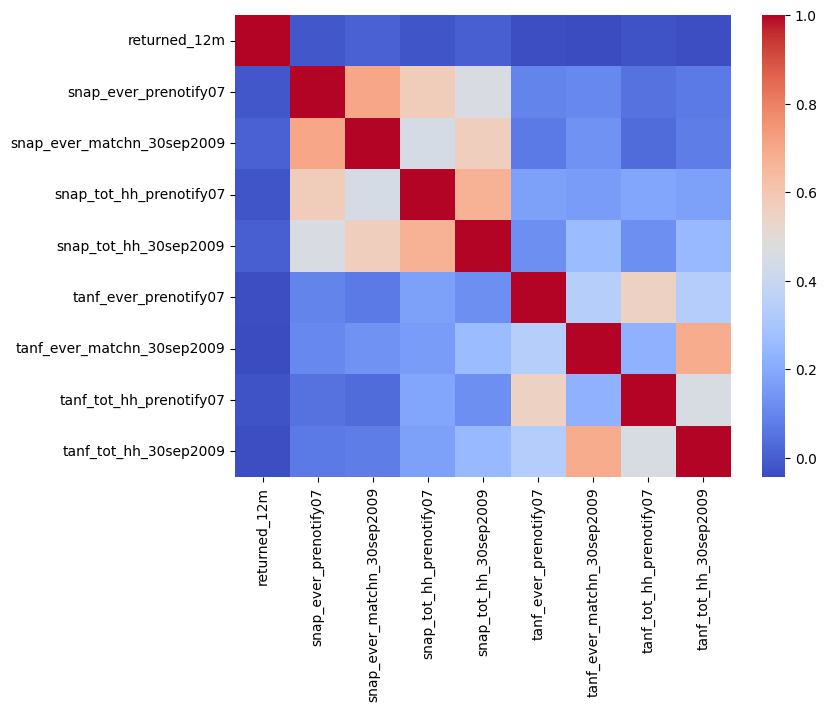

In [345]:
corr3_mat = f12m_imp_corr3.corr() #.iloc[0, :]
# focus on the first row / col

plt.figure(figsize = (8,6))
sns.heatmap(corr3_mat, cmap='coolwarm')
plt.show()
# nothing too significant here but we will see

The above procedure gives us two potential variables: protocol_12m (or weight_12m) and age.

How to identify confounding variables under a joint distribution setting? TA said that there is no good (standard) way to test for it without time. I propose this (which may or may not work): we run a random forest, which does automatic feature selection. Then we select the top few variables (i.e. those seem to predict missing values status well, thus high correlation), say $n = 5$.

*Update 02/29: can also try Lasso. Also this approach does bear the caveat of forming hypothesis based on the data that we want to apply it to, but prof said we can just mention it in the passing.*

*Update 03/03: never mind, I think we will need all the variables we can get to justify the independence assumption needed for the moment condition. But I will leave the graphs just in case they are useful later.*

*Update 03/04: I will still use a large set for $X$, but use random forest to identify a few important variables is good.*

In [456]:
# pip install scikit-learn

In [363]:
X_miss = pd.DataFrame(
    f12m_imp_data[['numhh_list_1.0', 'numhh_list_2.0', 'numhh_list_3.0',
                   'wave_survey12m_0.0', 'wave_survey12m_1.0', 'wave_survey12m_2.0', 
                   'wave_survey12m_3.0', 'wave_survey12m_4.0', 'wave_survey12m_5.0', 'wave_survey12m_6.0',
                   'protocol_12m', 
                   'age', 'have_phone_list', 'english_list', 'female_list', 'first_day_list', 'last_day_list', 
                   'pobox_list', 'self_list', 'week_list', 'zip_msa_list', 'OHIE_app_ins',
                   'snap_ever_prenotify07', 'snap_ever_matchn_30sep2009', 'snap_tot_hh_prenotify07', 'snap_tot_hh_30sep2009', 
                   'tanf_ever_prenotify07', 'tanf_ever_matchn_30sep2009','tanf_tot_hh_prenotify07','tanf_tot_hh_30sep2009'
                  ]])
y_miss = f12m_imp_data['returned_12m']

In [350]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import math

In [364]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_miss, y_miss, test_size=0.2, random_state=27)

In [365]:
Xscaler = StandardScaler().fit(X_full_train)
X_train_scaled = Xscaler.transform(X_full_train)

In [366]:
RF_full = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2).fit(X_train_scaled, y_full_train)

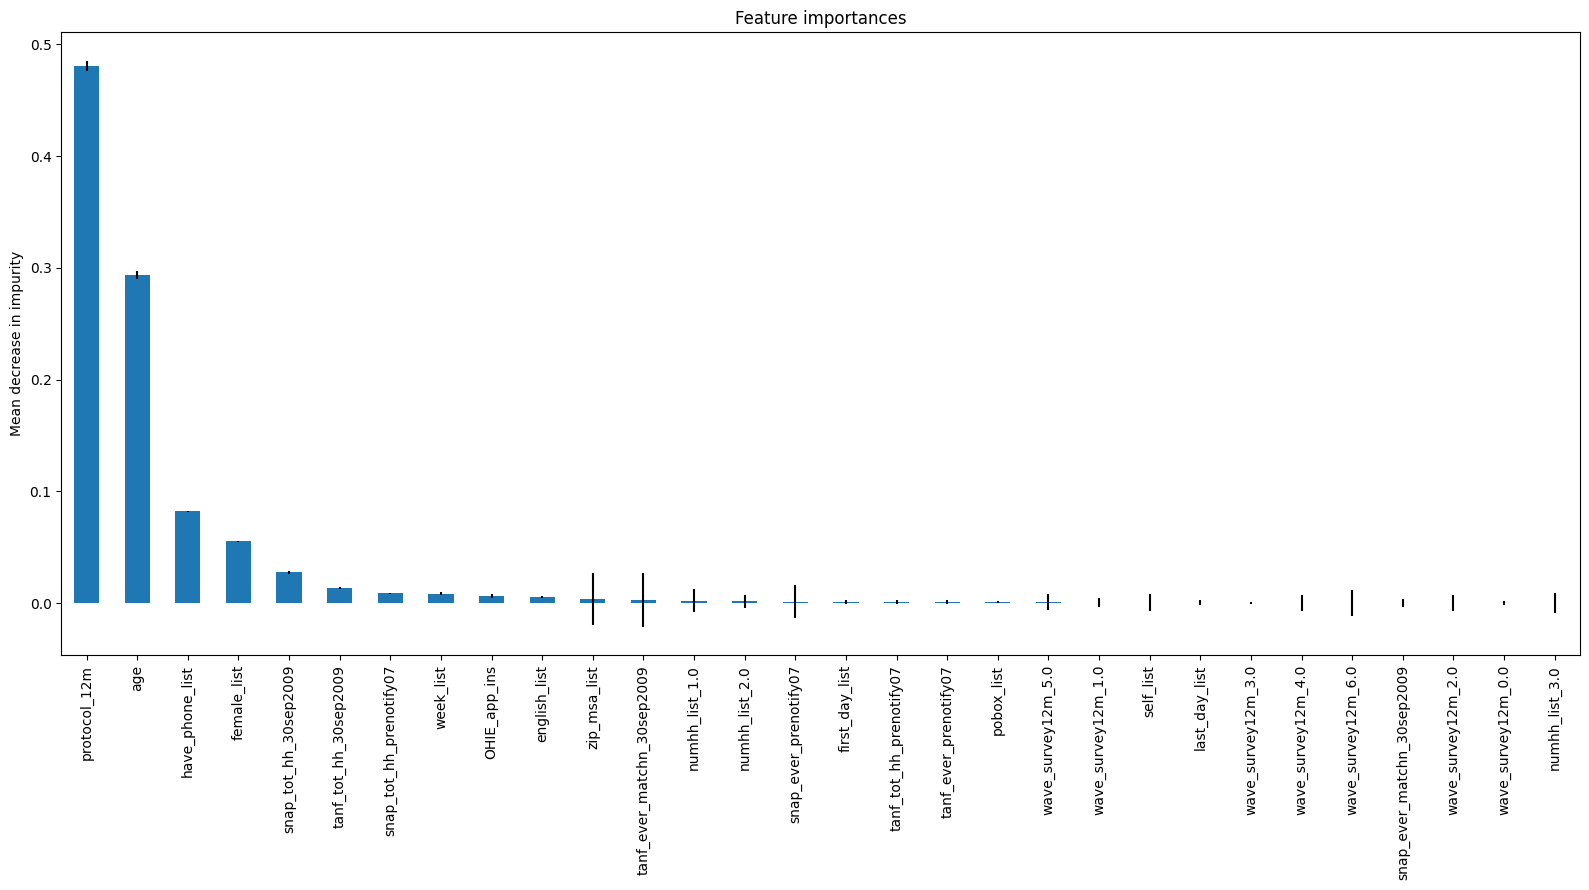

In [367]:
feature_names = X_miss.columns
importances = RF_full.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_full.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize =(16, 9))
forest_importances_sorted.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [373]:
forest_importances_sorted[:10]
# examine everything > 0.1

protocol_12m               0.481002
age                        0.293522
have_phone_list            0.082028
female_list                0.055418
snap_tot_hh_30sep2009      0.027600
tanf_tot_hh_30sep2009      0.013308
snap_tot_hh_prenotify07    0.008594
week_list                  0.008524
OHIE_app_ins               0.006142
english_list               0.005499
dtype: float64

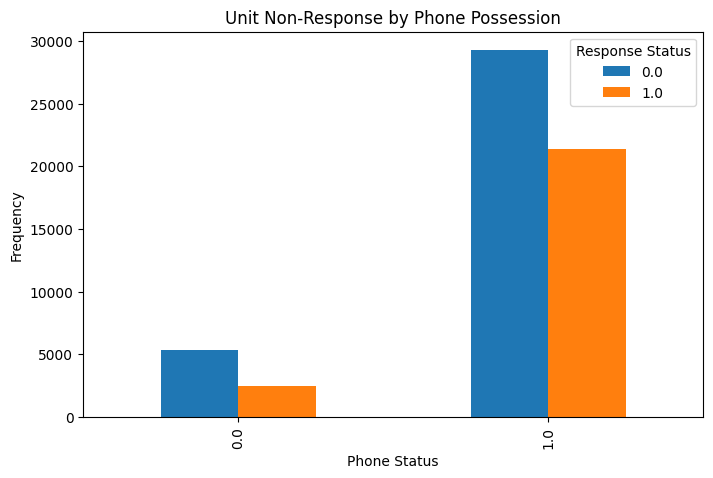

In [374]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)
pd.crosstab(f12m_imp_data.have_phone_list,f12m_imp_data.returned_12m).plot(kind='bar')
plt.title('Unit Non-Response by Phone Possession')
plt.xlabel('Phone Status')
plt.ylabel('Frequency')

legend = plt.legend()
legend.set_title('Response Status')

plt.savefig('just3')

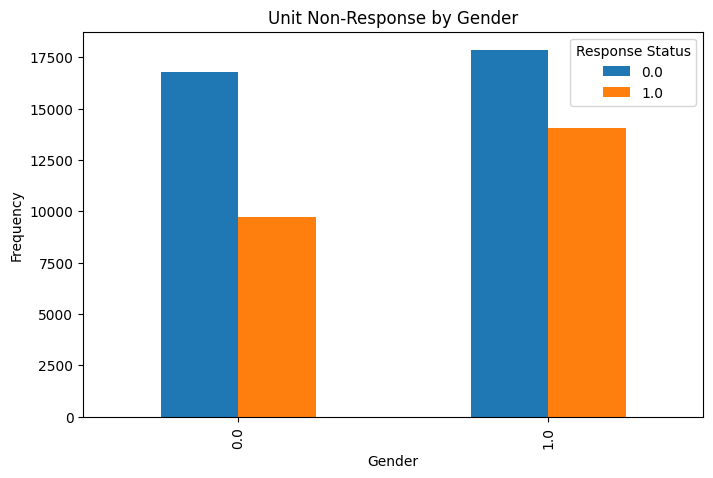

In [376]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)
f12m_imp_data = f12m_imp_data[f12m_imp_data['female_list'] != -1]
pd.crosstab(f12m_imp_data.female_list,f12m_imp_data.returned_12m).plot(kind='bar')
plt.title('Unit Non-Response by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

legend = plt.legend()
legend.set_title('Response Status')

plt.savefig('just4')

(Continuous variables are a bit more troublesome, skip for now)

## Part 3: Results

In [243]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
# need to read again because my computer crashed
#file_path = 'OHIE/'
#sdata12m = pd.read_csv(file_path+'s12m_data.csv')

In [248]:
outcome1 = ['rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 
             'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m' , 'hosp_num_mod_12m']

outcome2 = ['cost_any_oop_12m', 'cost_tot_oop_12m', 'cost_any_owe_12m', 
             'cost_tot_owe_12m', 'cost_borrow_12m', 'cost_refused_12m'] 

outcome3 = ['happiness_12m', 'health_gen_bin_12m', 'health_chg_bin_12m', 
             'baddays_phys_12m', 'baddays_ment_12m', 'health_work_12m', 
             'dep_interest_12m', 'dep_sad_12m'] 

outcomes = outcome1 + outcome2 + outcome3

In [369]:
W = ['numhh_list_1.0',
 'numhh_list_2.0',
 'numhh_list_3.0',
 'wave_survey12m_0.0',
 'wave_survey12m_1.0',
 'wave_survey12m_2.0',
 'wave_survey12m_3.0',
 'wave_survey12m_4.0',
 'wave_survey12m_5.0',
 'wave_survey12m_6.0',
 'numhh_wave_intcat_1.0:0.0',
 'numhh_wave_intcat_1.0:1.0',
 'numhh_wave_intcat_1.0:2.0',
 'numhh_wave_intcat_1.0:3.0',
 'numhh_wave_intcat_1.0:4.0',
 'numhh_wave_intcat_1.0:5.0',
 'numhh_wave_intcat_1.0:6.0',
 'numhh_wave_intcat_2.0:0.0',
 'numhh_wave_intcat_2.0:1.0',
 'numhh_wave_intcat_2.0:2.0',
 'numhh_wave_intcat_2.0:3.0',
 'numhh_wave_intcat_2.0:4.0',
 'numhh_wave_intcat_2.0:5.0',
 'numhh_wave_intcat_2.0:6.0',
 'numhh_wave_intcat_3.0:0.0',
 'numhh_wave_intcat_3.0:1.0',
 'numhh_wave_intcat_3.0:2.0']

In [371]:
X = ['protocol_12m', 'age', 'have_phone_list', 'female_list', 'snap_tot_hh_30sep2009', 'tanf_tot_hh_30sep2009']

In [253]:
X_alt = ['have_phone_list',
 'english_list',
 'female_list',
 'first_day_list',
 'last_day_list',
 'pobox_list',
 'self_list',
 'week_list',
 'zip_msa_list',
 'OHIE_app_ins',
 'age',
 'snap_ever_prenotify07',
 'snap_ever_matchn_30sep2009',
 'snap_tot_hh_prenotify07',
 'snap_tot_hh_30sep2009',
 'tanf_ever_prenotify07',
 'tanf_ever_matchn_30sep2009',
 'tanf_tot_hh_prenotify07',
 'tanf_tot_hh_30sep2009',
 'weight_intensive_12m',
     'protocol_12m']

In [255]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [260]:
rx_any_vars = W + X_alt + Z + D + S + Y
rx_any_data = f12m_imp_data[rx_any_vars]

In [261]:
from sklearn.preprocessing import StandardScaler

In [275]:
#W = controls
#X = ['intproto_indc', 'age', 'snap_tot_hh_prenotify07', 'snap_tot_hh_30sep2009', 'zip_msa_indc']
Z_b = ['treatment']
D_b = ['ohp_all_ever_matchn_30sep2009']
S_b = ['returned_12m']
Y_b = ['rx_any_12m']

rx_any_vars = W + X_alt + Z_b + D_b + S_b + Y_b
rx_any_data = f12m_imp_data[rx_any_vars]

Z = 'treatment'
D = 'ohp_all_ever_matchn_30sep2009'
S = 'returned_12m'
Y = 'rx_any_12m'

In [262]:
def get_tau(Y, D, Z, S, r, q, a1, a0, b1, b0, f1, f0, g1, g0):
    g11 = (Y*Z*S)/ (r*q) - (Z - r)*a1/(r*r) - (S - q)*b1/(r*q)
    g10 = (Y*(1-Z)*S)/((1-r)*q) - (Z - r)*a0/((1-r)*(1-r)) - (S - q)*b0/((1-r)*q)
    g21 = (D*Z*S)/(r*q) - (Z - r)*f1/(r*r) - (S - q)*g1/(r*q)
    g20 = (D*(1-Z)*S)/((1-r)*q) - (Z - r)*f0/((1-r)*(1-r)) - (S - q)*g0/((1-r)*q)
    
    return np.mean(g11 - g10) / np.mean(g21 - g20)

In [263]:
rx_any_data.head()

,numhh_list_1.0,numhh_list_2.0,numhh_list_3.0,wave_survey12m_0.0,wave_survey12m_1.0,wave_survey12m_2.0,wave_survey12m_3.0,wave_survey12m_4.0,wave_survey12m_5.0,wave_survey12m_6.0,numhh_wave_intcat_1.0:0.0,numhh_wave_intcat_1.0:1.0,numhh_wave_intcat_1.0:2.0,numhh_wave_intcat_1.0:3.0,numhh_wave_intcat_1.0:4.0,numhh_wave_intcat_1.0:5.0,numhh_wave_intcat_1.0:6.0,numhh_wave_intcat_2.0:0.0,numhh_wave_intcat_2.0:1.0,numhh_wave_intcat_2.0:2.0,numhh_wave_intcat_2.0:3.0,numhh_wave_intcat_2.0:4.0,numhh_wave_intcat_2.0:5.0,numhh_wave_intcat_2.0:6.0,numhh_wave_intcat_3.0:0.0,numhh_wave_intcat_3.0:1.0,numhh_wave_intcat_3.0:2.0,have_phone_list,english_list,female_list,first_day_list,last_day_list,pobox_list,self_list,week_list,zip_msa_list,OHIE_app_ins,age,snap_ever_prenotify07,snap_ever_matchn_30sep2009,snap_tot_hh_prenotify07,snap_tot_hh_30sep2009,tanf_ever_prenotify07,tanf_ever_matchn_30sep2009,tanf_tot_hh_prenotify07,tanf_tot_hh_30sep2009,weight_intensive_12m,protocol_12m,treatment,ohp_all_ever_matchn_30sep2009,returned_12m,rx_any_12m
0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,30.0,1.0,1.0,7453.0,746.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.6
1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,24.0,1.0,1.0,2404.0,3962.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.8
2,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,62.0,1.0,1.0,2367.0,3014.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,40.0,1.0,1.0,4089.0,3363.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [264]:
def dml_tau_est(data, W, X, Z, D, S, Y, nfolds=5):
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=27)
    tau1_vec = []
    tau2_vec = []
    
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        # technically we need to scale data, but I don't want to worry about that right now
        #XW_train = train_data[X + W]
        #XW_train_scaler = StandardScaler().fit(XW_train_data)
        #XW_train_scaled = XW_train_scaler.transform(XW_train_data)
        #XW_test_scaled = XW_test_scaler.transform(XW_test_data)
        # let's not scale Y, I don't even know what it means to scale smth with missing values

        # Predict r(W) 
        r_model = RandomForestClassifier()
        r_model.fit(train_data[W], train_data[Z])
        r_pred = r_model.predict_proba(test_data[W])[:,1]
        r_pred[r_pred == 0] = 1e-6

        # Predict q1(X) 
        q1_model = RandomForestClassifier()
        q1_model.fit(train_data[X], train_data[S])
        q1_pred = q1_model.predict_proba(test_data[X])[:,1]
        q1_pred[q1_pred == 0] = 1e-6

        # Predict q2(X,W) 
        q2_model = RandomForestClassifier()
        q2_model.fit(train_data[X + W], train_data[S])
        q2_pred = q2_model.predict_proba(test_data[X + W])[:,1]
        q2_pred[q2_pred == 0] = 1e-6

        ftrain_data = train_data[train_data[S] == 1]

        # Predict a1(W)
        a1_model = RandomForestRegressor()
        a1_model.fit(ftrain_data[W], ftrain_data[Y] * ftrain_data[Z])
        a1_pred = a1_model.predict(test_data[W])

        # Predict a0(W)
        a0_model = RandomForestRegressor()
        a0_model.fit(ftrain_data[W], ftrain_data[Y])
        a0_pred = a0_model.predict(test_data[W]) - a1_pred

        # Predict b1(W)
        b1_model = RandomForestRegressor()
        b1_model.fit(ftrain_data[X + W], ftrain_data[Y] * ftrain_data[Z])
        b1_pred = b1_model.predict(test_data[X + W])

        # Predict b0(W)
        b0_model = RandomForestRegressor()
        b0_model.fit(ftrain_data[X + W], ftrain_data[Y])
        b0_pred = b0_model.predict(test_data[X + W]) - b1_pred

         # Predict f1(W)
        f1_model = RandomForestClassifier()
        f1_model.fit(ftrain_data[W], ftrain_data[D] * ftrain_data[Z])
        f1_pred = f1_model.predict_proba(test_data[W])[:,1]
        f1_pred[f1_pred == 0] = 1e-6

        # Predict f0(W)
        f0_model = RandomForestClassifier()
        f0_model.fit(ftrain_data[W], ftrain_data[D])
        f0_pred = f0_model.predict_proba(test_data[W])[:,1] - f1_pred
        f0_pred[f0_pred == 0] = 1e-6

        # Predict g1(W)
        g1_model = RandomForestClassifier()
        g1_model.fit(ftrain_data[X + W], ftrain_data[D] * ftrain_data[Z])
        g1_pred = g1_model.predict_proba(test_data[X + W])[:,1]
        g1_pred[g1_pred == 0] = 1e-6

        # Predict f0(W)
        g0_model = RandomForestClassifier()
        g0_model.fit(ftrain_data[X + W], ftrain_data[D])
        g0_pred = g0_model.predict_proba(test_data[X + W])[:,1] - g1_pred
        g0_pred[g0_pred == 0] = 1e-6

        test_data.loc[test_data[S] == 0, Y] = 0

        tau1 = get_tau(test_data[Y], test_data[D], test_data[Z], test_data[S], 
                       r_pred, q1_pred, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)
        tau2 = get_tau(test_data[Y], test_data[D], test_data[Z], test_data[S], 
                       r_pred, q2_pred, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)

        tau1_vec.append(tau1)
        tau2_vec.append(tau2)

    return np.mean(tau1_vec), np.mean(tau2_vec)


In [265]:
def dml_tau_est1(data, W, X, Z, D, S, Y, nfolds=5):
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=27)
    tau1_vec = []
    tau2_vec = []
    
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        #X_data = train_data[X_alt] # train_data[X]
        #W_data = train_data[W] 

        # technically we need to scale data, but I don't want to worry about that right now
        #XW_train = train_data[X + W]
        #XW_train_scaler = StandardScaler().fit(XW_train_data)
        #XW_train_scaled = XW_train_scaler.transform(XW_train_data)

        #XW_test_data = test_data[X + W]
        #XW_test_scaler = StandardScaler().fit(XW_test_data)
        #XW_test_scaled = XW_test_scaler.transform(XW_test_data)
        # I don't think there is anything else to scale, but watch out

        # Predict r(W) 
        r_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        r_model.fit(train_data[W], train_data[Z])
        r_pred = r_model.predict_proba(test_data[W])[:,1]
        r_pred[r_pred == 0] = 1e-6

        # Predict q1(X) 
        q1_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        q1_model.fit(train_data[X], train_data[S])
        q1_pred = q1_model.predict_proba(test_data[X])[:,1]
        q1_pred[q1_pred == 0] = 1e-6

        # Predict q2(X,W) 
        q2_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        q2_model.fit(train_data[X + W], train_data[S])
        q2_pred = q2_model.predict_proba(test_data[X + W])[:,1]
        q2_pred[q2_pred == 0] = 1e-6

        ftrain_data = train_data[train_data[S] == 1]

        # Predict a1(W)
        a1_model = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        a1_model.fit(ftrain_data[W], ftrain_data[Y] * ftrain_data[Z])
        a1_pred = a1_model.predict(test_data[W])

        # Predict a0(W)
        a0_model = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        a0_model.fit(ftrain_data[W], ftrain_data[Y])
        a0_pred = a0_model.predict(test_data[W]) - a1_pred

        # Predict b1(W)
        b1_model = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        b1_model.fit(ftrain_data[X + W], ftrain_data[Y] * ftrain_data[Z])
        b1_pred = b1_model.predict(test_data[X + W])

        # Predict b0(W)
        b0_model = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        b0_model.fit(ftrain_data[X + W], ftrain_data[Y])
        b0_pred = b0_model.predict(test_data[X + W]) - b1_pred

         # Predict f1(W)
        f1_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        f1_model.fit(ftrain_data[W], ftrain_data[D] * ftrain_data[Z])
        f1_pred = f1_model.predict_proba(test_data[W])[:,1]
        f1_pred[f1_pred == 0] = 1e-6

        # Predict f0(W)
        f0_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        f0_model.fit(ftrain_data[W], ftrain_data[D])
        f0_pred = f0_model.predict_proba(test_data[W])[:,1] - f1_pred
        f0_pred[f0_pred == 0] = 1e-6

        # Predict g1(W)
        g1_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        g1_model.fit(ftrain_data[X + W], ftrain_data[D] * ftrain_data[Z])
        g1_pred = g1_model.predict_proba(test_data[X + W])[:,1]
        g1_pred[g1_pred == 0] = 1e-6

        # Predict f0(W)
        g0_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
        g0_model.fit(ftrain_data[X + W], ftrain_data[D])
        g0_pred = g0_model.predict_proba(test_data[X + W])[:,1] - g1_pred
        g0_pred[g0_pred == 0] = 1e-6

        test_data.loc[test_data[S] == 0, Y] = 0

        tau1 = get_tau(test_data[Y], test_data[D], test_data[Z], test_data[S], 
                       r_pred, q1_pred, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)
        tau2 = get_tau(test_data[Y], test_data[D], test_data[Z], test_data[S], 
                       r_pred, q2_pred, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)

        tau1_vec.append(tau1)
        tau2_vec.append(tau2)

    return np.mean(tau1_vec), np.mean(tau2_vec)


In [269]:
rx_any_tau1, rx_any_tau2 = dml_tau_est(rx_any_data, W, X_alt, Z, D, S, Y, nfolds=5)

In [279]:
rx_any_tau1
# -0.3407785698039284
rx_any_tau2 
# 3.7546992406302024
# -4.322344066354126

-16.467034503375015

In [277]:
rx_any_tau3, rx_any_tau4 = dml_tau_est1(rx_any_data, W, X_alt, Z, D, S, Y, nfolds=5)

In [283]:
rx_any_tau3
# -0.12216935650452161
rx_any_tau4
# -0.12118900190741591
# it might actually work???
# don't forget to test for adjusted later

-0.12118900190741591

In [288]:
#W = controls
#X = ['intproto_indc', 'age', 'snap_tot_hh_prenotify07', 'snap_tot_hh_30sep2009', 'zip_msa_indc']
Y_b = ['rx_num_mod_12m']

rx_num_vars = W + X_alt + Z_b + D_b + S_b + Y_b
rx_num_data = f12m_imp_data[rx_num_vars]

Y = 'rx_num_mod_12m'
#rx_num_data

In [289]:
rx_num_tau1, rx_num_tau2 = dml_tau_est1(rx_num_data, W, X_alt, Z, D, S, Y, nfolds=5)

In [293]:
rx_num_tau1
# -0.4456546732483189
rx_num_tau2 
# -0.4430509542767182
# damn glad it aligns but now I don't know what to think

-0.4430509542767182

I have to stop here because of time constraint, but the fact that these the two outcomes are similar means that the independence assumption likely holds!

In [372]:
# zone of banishment: please ignore these

In [4]:
# this is a point of concern, will leave it be for now
#sdata12m.columns[:20]
# 'OHIE_app_ins'
# 'ohp_all_ever_matchn_30sep2009'
sdata12m['OHIE_app_ins'].value_counts()
#0    49763
#1     8642
sdata12m['ohp_all_ever_matchn_30sep2009'].value_counts()
#NOT enrolled    42829
#Enrolled        15576
# we have to deal with this somehow, figure out later

ohp_all_ever_matchn_30sep2009
NOT enrolled    42829
Enrolled        15576
Name: count, dtype: int64